# Lista 07

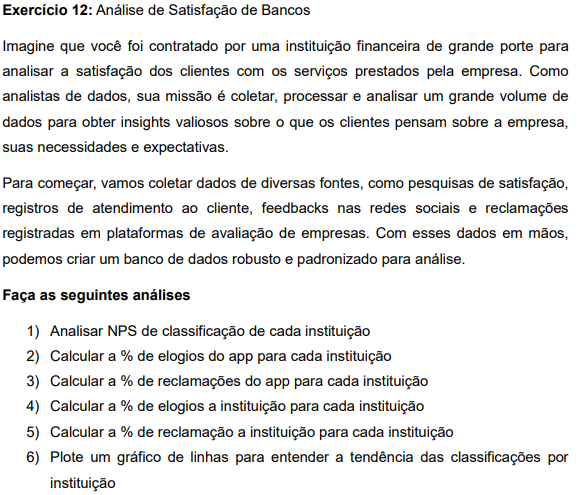

In [80]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#importando arquivo:
caminho='./Arquivos/dados-satisfação.xlsx'

#Alocar as informações em da data Frame
dados= pd.read_excel(caminho, sheet_name='treino')

#Exibir o cabeçalho do dataframe
dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [81]:
#Substituindo dados:
dados['Elogio quanto ao app']=dados['Elogio quanto ao app'].replace('SIM',1)
dados['Elogio quanto ao app']=dados['Elogio quanto ao app'].replace('NAO',0)


dados['Elogio a Instituição']=dados['Elogio a Instituição'].replace('SIM',1)
dados['Elogio a Instituição']=dados['Elogio a Instituição'].replace('NÃO',0)


dados['Reclamação quanto ao app']=dados['Reclamação quanto ao app'].replace('SIM',1)
dados['Reclamação quanto ao app']=dados['Reclamação quanto ao app'].replace('NÃO',0)


dados['Reclamação a Instituição']=dados['Reclamação a Instituição'].replace('SIM',1)
dados['Reclamação a Instituição']=dados['Reclamação a Instituição'].replace('NÃO',0)

dados['Não Classificável']=dados['Não Classificável'].replace('SIM',1)
dados['Não Classificável']=dados['Não Classificável'].replace('NÃO',0)

dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,5,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,5,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,5,1,0,0,0,0


In [82]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   object        
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int64         
 7   Reclamação a Instituição  8702 non-null   int64         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 612.0+ KB


In [83]:
#SUBSTITUINDO A COLUMA DE CLASSIFICAÇÃO 
dados['Classificação']=dados['Classificação'].replace(2,-1)
dados['Classificação']=dados['Classificação'].replace(1,-1)
dados['Classificação']=dados['Classificação'].replace(5,1)
dados['Classificação']=dados['Classificação'].replace(4,1)
dados['Classificação']=dados['Classificação'].replace(3,0)
dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


In [84]:
# %Crie um dataframe chamado df_classificacao, para agrupar os dados por instituição, calculando a média da da coluna Classificação.

#dados['Instituição'].drop_duplicates()
dados['Instituição'].unique()

array(['Banco do Brasil', 'Banco Itau', 'Banco Bradesco', 'Nubank',
       'Caixa Econômica Federal'], dtype=object)

In [85]:
#5) Crie um dataframe chamado df_classificacao, para agrupar os dados por  instituição, calculando a média da da coluna Classificação
df_classificacao= dados.groupby(['Instituição'])['Classificação'].mean()
df_classificacao
#df_classificacao.values[]

Instituição
Banco Bradesco             0.682366
Banco Itau                 0.569540
Banco do Brasil            0.781609
Caixa Econômica Federal    0.424138
Nubank                     0.585296
Name: Classificação, dtype: float64

<Axes: xlabel='Instituição', ylabel='Classificação'>

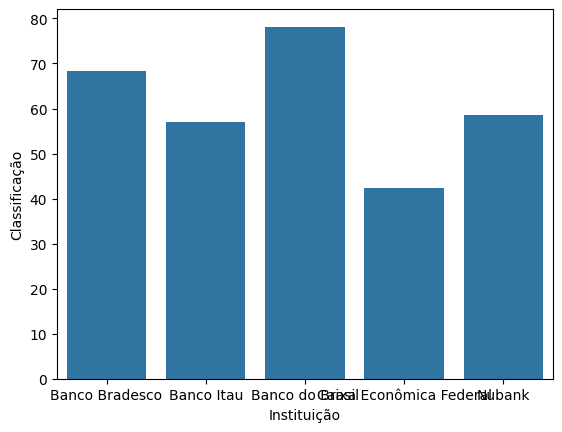

In [86]:
#6) Multiplique os valores da coluna Classificação por 100.
df_classificacao= dados.groupby(['Instituição'])['Classificação'].agg('mean').reset_index()
df_classificacao['Classificação']= df_classificacao['Classificação']*100
df_classificacao

#Criar o gráfico 
sns.barplot(x=df_classificacao['Instituição'],
            y=df_classificacao['Classificação'])

In [87]:
# Análise do % de elogios e relcamações do app para cada instituição
df_classificacao= dados.groupby(['Instituição'])['Elogio quanto ao app'].agg('mean').reset_index()
df_classificacao['Elogio quanto ao app']= df_classificacao['Elogio quanto ao app']*100
df_classificacao

#Criar o gráfico 
sns.barplot(x=df_classificacao['Instituição'],
            y=df_classificacao['Elogio quanto ao app'])

TypeError: agg function failed [how->mean,dtype->object]